# Artificial Intelligence Lab 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# TASK 1: Structured Dataset Acquisition and Structural Verification

In [ ]:
df_iris = sns.load_dataset('iris')
df_titanic = sns.load_dataset('titanic')
df_tips = sns.load_dataset('tips')

def inspect_dataset(name, df):
    print(f"\n--- INSPECTION: {name} DATASET ---")
    print(f"shape: {df.shape}")
    print(f"columns: {df.columns.tolist()}")
    print("first 5 rows:")
    print(df.head(5))
    print("last 5 rows:")
    print(df.tail(5))
    print("\ninfo:")
    print(df.info())

inspect_dataset("iris", df_iris)
inspect_dataset("titanic", df_titanic)
inspect_dataset("tips", df_tips)


--- INSPECTION: iris DATASET ---
shape: (150, 5)
columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
first 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
last 5 rows:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

info:
<class 'pandas.DataFrame'>
RangeInd

# Task 2: Attribute Role Identification

In [13]:
classification_data = {
    "Dataset": ["Iris", "Titanic", "Tips"],
    "Numerical Features": [
        "sepal_length, sepal_width, petal_length, petal_width", 
        "age, fare, sibsp, parch", 
        "total_bill, size"
    ],
    "Categorical Features": [
        "None", 
        "sex, embarked, class, who, deck, embark_town, alive, alone, adult_male, pclass", 
        "sex, smoker, day, time"
    ],
    "Target Variable": [
        "species", 
        "survived", 
        "tip"
    ]
}

df_classification = pd.DataFrame(classification_data)


display(df_classification)


,Dataset,Numerical Features,Categorical Features,Target Variable
0,Iris,"sepal_length, sepal_width, petal_length, petal...",None,species
1,Titanic,"age, fare, sibsp, parch","sex, embarked, class, who, deck, embark_town, ...",survived
2,Tips,"total_bill, size","sex, smoker, day, time",tip


# Task 3: Missing Data Quantification and Imputation

In [4]:
print("Missing values BEFORE cleaning:")
print(df_titanic.isnull().sum())


mean_age = df_titanic['age'].mean()
df_titanic['age'] = df_titanic['age'].fillna(mean_age)

mode_embarked = df_titanic['embarked'].mode()[0]
df_titanic['embarked'] = df_titanic['embarked'].fillna(mode_embarked)

df_titanic.drop(columns=['deck'], inplace=True,errors='ignore')

print("\nMissing values AFTER cleaning:")
print(df_titanic.isnull().sum())

Missing values BEFORE cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values AFTER cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


# Task 4: Redundancy Detection and Duplicate Removal

In [5]:
def cleanDuplicates(name, df):
    initial_count = df.shape[0]
    duplicates = df.duplicated().sum()
    
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
    
    final_count = df.shape[0]
    print(f"{name}: removed {duplicates} duplicates. ({initial_count} -> {final_count} rows)")

cleanDuplicates("iris", df_iris)
cleanDuplicates("titanic", df_titanic)
cleanDuplicates("tips", df_tips)

iris: removed 1 duplicates. (150 -> 149 rows)
titanic: removed 111 duplicates. (891 -> 780 rows)
tips: removed 1 duplicates. (244 -> 243 rows)


# Task 5: Descriptive Statistical Characterization

In [14]:
print("IRIS: species-wise stats")
print(df_iris.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(['mean', 'std']))
print("\nTITANIC: Survival Stats")
print(df_titanic.groupby('survived')[['age', 'fare']].mean())

print("\nTIPS: General Stats")
print(df_tips[['total_bill', 'tip']].agg(['mean', 'median']))

IRIS: species-wise stats
           sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa         5.006000  0.352490    3.428000  0.379064     1.462000   
versicolor     5.936000  0.516171    2.770000  0.313798     4.260000   
virginica      6.604082  0.632113    2.979592  0.323380     5.561224   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664    0.246000  0.105386  
versicolor  0.469911    1.326000  0.197753  
virginica   0.553706    2.028571  0.276887  

TITANIC: Survival Stats
                age       fare
survived                      
0         30.707298  24.026482
1         28.503682  50.194333

TIPS: General Stats
        total_bill       tip
mean     19.813868  3.002387
median   17.810000  2.920000


# Task 6: Distribution Analysis (Univariate Visualization)

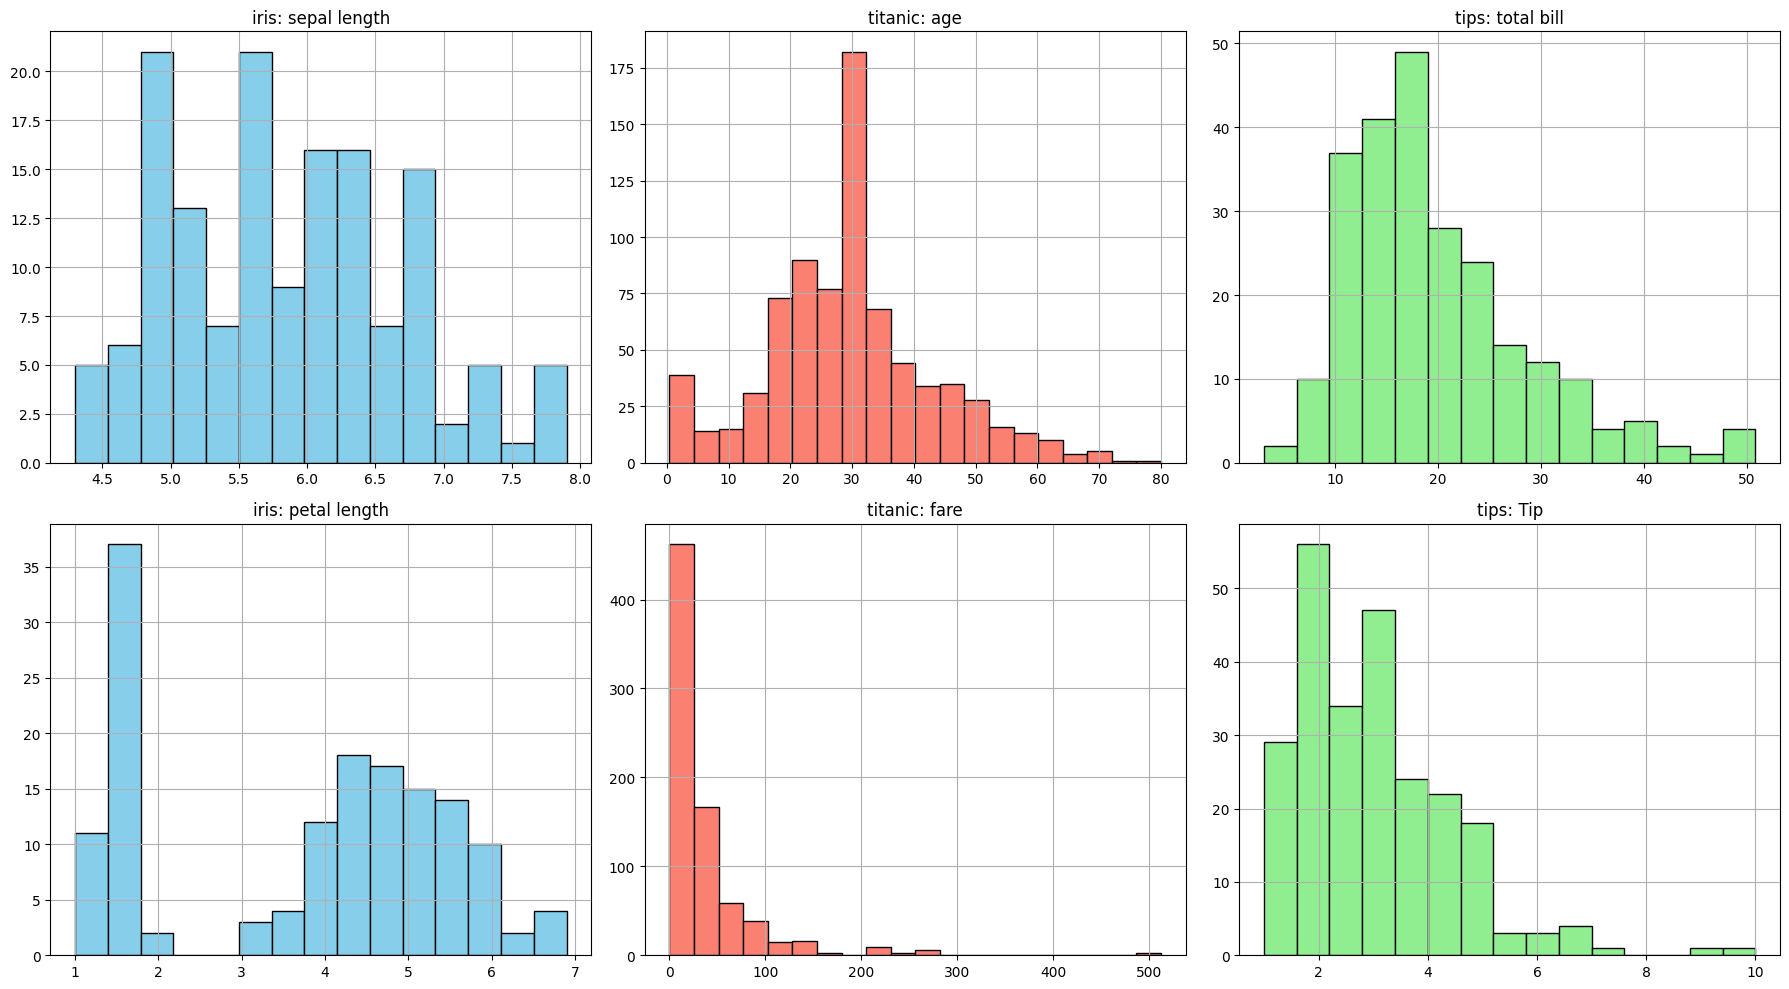

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

df_iris['sepal_length'].hist(ax=axes[0, 0], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('iris: sepal length')

df_titanic['age'].hist(ax=axes[0, 1], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('titanic: age')

df_tips['total_bill'].hist(ax=axes[0, 2], bins=15, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('tips: total bill')

df_iris['petal_length'].hist(ax=axes[1, 0], bins=15, color='skyblue', edgecolor='black')
axes[1, 0].set_title('iris: petal length')

df_titanic['fare'].hist(ax=axes[1, 1], bins=20, color='salmon', edgecolor='black')
axes[1, 1].set_title('titanic: fare')

df_tips['tip'].hist(ax=axes[1, 2], bins=15, color='lightgreen', edgecolor='black')
axes[1, 2].set_title('tips: Tip')

plt.tight_layout()
plt.show()

# Task 7: Outlier Identification Using IQR

total bill outliers: 9 (bounds: -2.81 to 40.37)
tip outliers:        8 (bounds: -0.36 to 5.94)


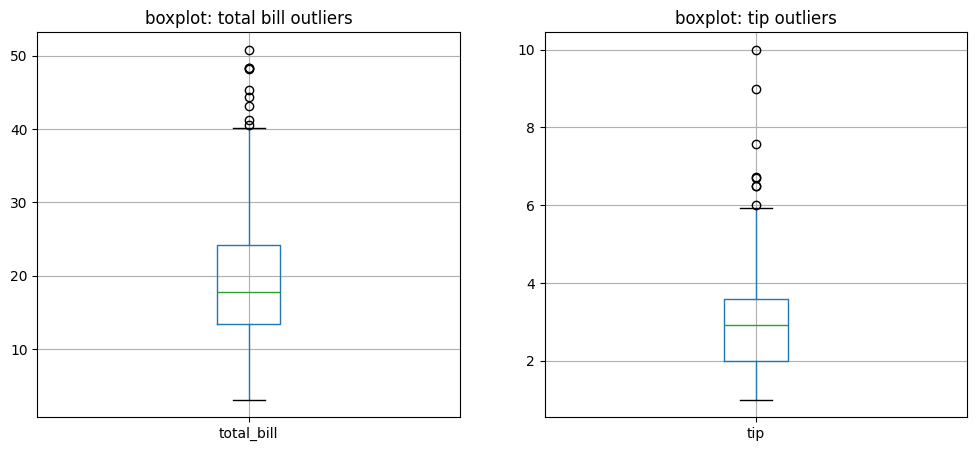

In [20]:
Q1_bill = df_tips['total_bill'].quantile(0.25)
Q3_bill = df_tips['total_bill'].quantile(0.75)
IQR_bill = Q3_bill - Q1_bill

lower_bill = Q1_bill - 1.5 * IQR_bill
upper_bill = Q3_bill + 1.5 * IQR_bill

outliers_bill = df_tips[(df_tips['total_bill'] < lower_bill) | (df_tips['total_bill'] > upper_bill)]

Q1_tip = df_tips['tip'].quantile(0.25)
Q3_tip = df_tips['tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip

lower_tip = Q1_tip - 1.5 * IQR_tip
upper_tip = Q3_tip + 1.5 * IQR_tip

outliers_tip = df_tips[(df_tips['tip'] < lower_tip) | (df_tips['tip'] > upper_tip)]

print(f"total bill outliers: {len(outliers_bill)} (bounds: {lower_bill:.2f} to {upper_bill:.2f})")
print(f"tip outliers:        {len(outliers_tip)} (bounds: {lower_tip:.2f} to {upper_tip:.2f})")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_tips.boxplot(column=['total_bill'])
plt.title('boxplot: total bill outliers')

plt.subplot(1, 2, 2)
df_tips.boxplot(column=['tip'])
plt.title('boxplot: tip outliers')

plt.show()

# Task 8: Outlier Mitigation via Row Elimination

In [ ]:
print(f"original shape: {df_tips.shape}")

df_tips_cleaned = df_tips[
    (df_tips['total_bill'] >= lower_bill) & (df_tips['total_bill'] <= upper_bill) &
    (df_tips['tip'] >= lower_tip) & (df_tips['tip'] <= upper_tip)]

print(f"cleaned shape:  {df_tips_cleaned.shape}")

removed = df_tips.shape[0] - df_tips_cleaned.shape[0]
print(f"total rows removed: {removed}")

original shape: (243, 7)
Cleaned Shape:  (229, 7)
total rows removed: 14


# Task 9: Post-Processing Statistical Reassessment

In [ ]:
cols = ['total_bill', 'tip']

print("BEFORE Removal (original)")
print(df_tips[cols].agg(['mean', 'median', 'std']))

print("\nAFTER Removal (cleaned)")
print(df_tips_cleaned[cols].agg(['mean', 'median', 'std']))

BEFORE Removal (Original)
        total_bill       tip
mean     19.813868  3.002387
median   17.810000  2.920000
std       8.910071  1.385002

AFTER Removal (Cleaned)
        total_bill       tip
mean     18.546856  2.823450
median   17.290000  2.720000
std       7.237151  1.103217


# Task 10: Bivariate Analysis (Scatter Plots)

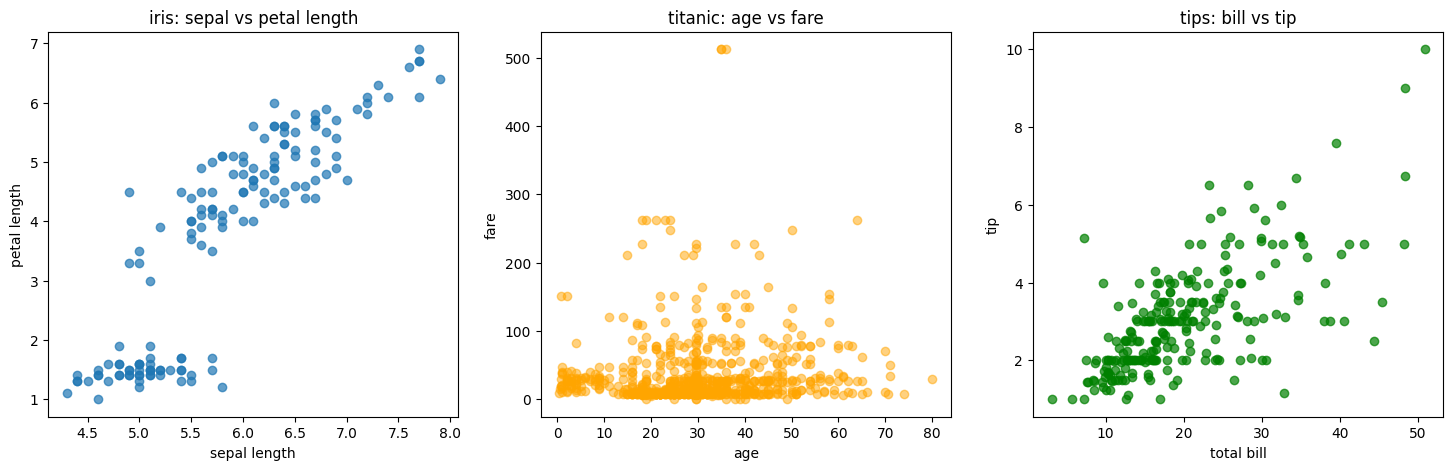

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df_iris['sepal_length'], df_iris['petal_length'], alpha=0.7)
axes[0].set_title('iris: sepal vs petal length')
axes[0].set_xlabel('sepal length')
axes[0].set_ylabel('petal length')

axes[1].scatter(df_titanic['age'], df_titanic['fare'], alpha=0.5,color='orange')
axes[1].set_title('titanic: age vs fare')
axes[1].set_xlabel('age')
axes[1].set_ylabel('fare')

axes[2].scatter(df_tips['total_bill'], df_tips['tip'], alpha=0.7, color='green')
axes[2].set_title('tips: bill vs tip')
axes[2].set_xlabel('total bill')
axes[2].set_ylabel('tip')

plt.show()

### Analysis 

**1. Iris: Sepal Length vs Petal Length**
* **Linearity:**  There is a positive trend. As sepal length goes up, petal length goes up.
* **Clustering:** There are two separate groups. One small cluster (bottom left) is completely detached from the rest.
* **Strength:** The relationship is strong

**2. Titanic: Age vs Fare**
* **Linearity:** No clear pattern
* **Clustering:** Most passengers are clustered at the bottom 
* **Strength:** The relationship is weak

**3. Tips: Total Bill vs Tip**
* **Linearity:** Positive trend. Higher bills result in higher tips
* **Clustering:** The points are tight at the start but they scatter as the bill gets higher
* **Strength:** Moderately strong relationship